DESCRIPTION:
Task
A rectangle with sides equal to even integers a and b is drawn on the Cartesian plane. Its center (the intersection point of its diagonals) coincides with the point (0, 0), but the sides of the rectangle are not parallel to the axes; instead, they are forming 45 degree angles with the axes.

How many points with integer coordinates are located inside the given rectangle (including on its sides)?

Example
For a = 6 and b = 4, the output should be 23

The following picture illustrates the example, and the 23 points are marked green.

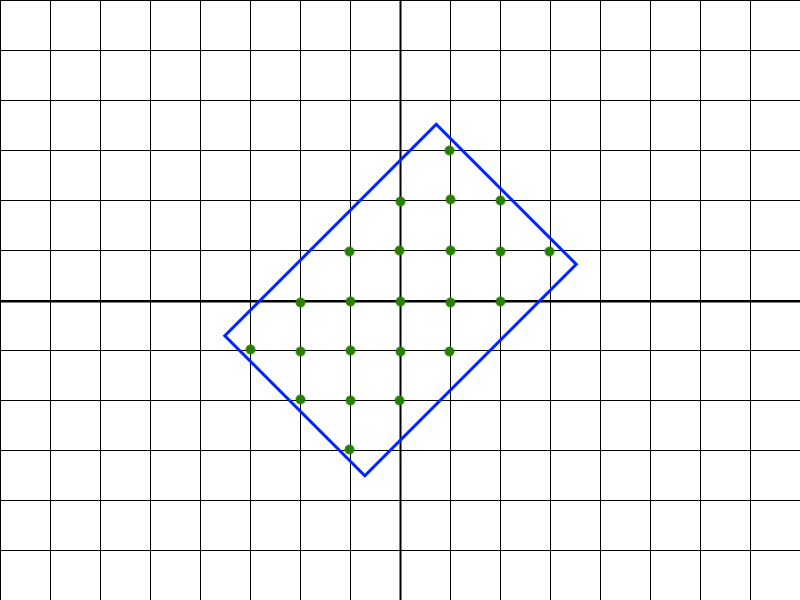

Input/Output
[input] integer a

A positive even integer.

Constraints: 2 ≤ a ≤ 10000.

[input] integer b

A positive even integer.

Constraints: 2 ≤ b ≤ 10000.

[output] an integer

The number of inner points with integer coordinates.

In [ ]:
import math

def rotatePoint(sm_point: tuple, angle: int) -> tuple:
    deg = math.pi/(180/angle)
    return (sm_point[0] * math.cos(deg) - sm_point[1] * math.sin(deg),
            sm_point[0] * math.sin(deg) + sm_point[1] * math.cos(deg))

def getVertexes(a: int, b: int, angle: int, center_x: int=0, center_y: int=0) -> tuple:
    a_point = (center_x - a/2, center_y + b/2)
    b_point = (center_x - a/2, center_y - b/2)
    c_point = (center_x + a/2, center_y - b/2)
    d_point = (center_x + a/2, center_y + b/2)
    a_point = rotatePoint(a_point, angle)
    b_point = rotatePoint(b_point, angle)
    c_point = rotatePoint(c_point, angle)
    d_point = rotatePoint(d_point, angle)
    
    return (a_point, b_point, c_point, d_point)

# more than zero - upper
# equal zero - on line
# less than zero - lower
def getHalfPlane(point: tuple, line: tuple) -> float:
    return (point[1]-line[0][1])*\
           (line[1][0]-line[0][0])/\
           (line[1][1]-line[0][1])+\
           line[0][0]-\
           point[0]

def getY(x: float, line: tuple) -> float:
    return (x-line[0][0])*\
           (line[1][1]-line[0][1])/\
           (line[1][0]-line[0][0])+\
           line[0][1]

def getYRange(x: float, tup_vertex: tuple) -> tuple:
    rng = [tup_vertex[3][1], tup_vertex[1][1]]
    for i in range(len(tup_vertex)):
        try:
            tmp = getY(x, (tup_vertex[i],tup_vertex[i+1]))
        except IndexError:
            tmp = getY(x, (tup_vertex[i],tup_vertex[0]))
        if tup_vertex[1][1] <= tmp <= tup_vertex[3][1]:
            if tmp > rng[1]:
                rng[0] = rng[1]
                rng[1] = tmp
            else:
                rng[1] = rng[0]
                rng[0] = tmp
                
    return tuple(rng)

def rectangle_rotation(a, b):
    tup_vertex = getVertexes(a, b, 45)
    res = 0
    for x in range(math.trunc(tup_vertex[0][0]), math.trunc(tup_vertex[2][0])+1):
        rng = getYRange(x, tup_vertex)
        res += math.trunc(rng[1]) - math.trunc(rng[0])
        if rng[0] < 0 and rng[1] > 0:
            res += 1
    return res